In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

##Libraries and dataframe was imported.

In [3]:
dataFrame.head()

##dataFrame some specials were called.

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


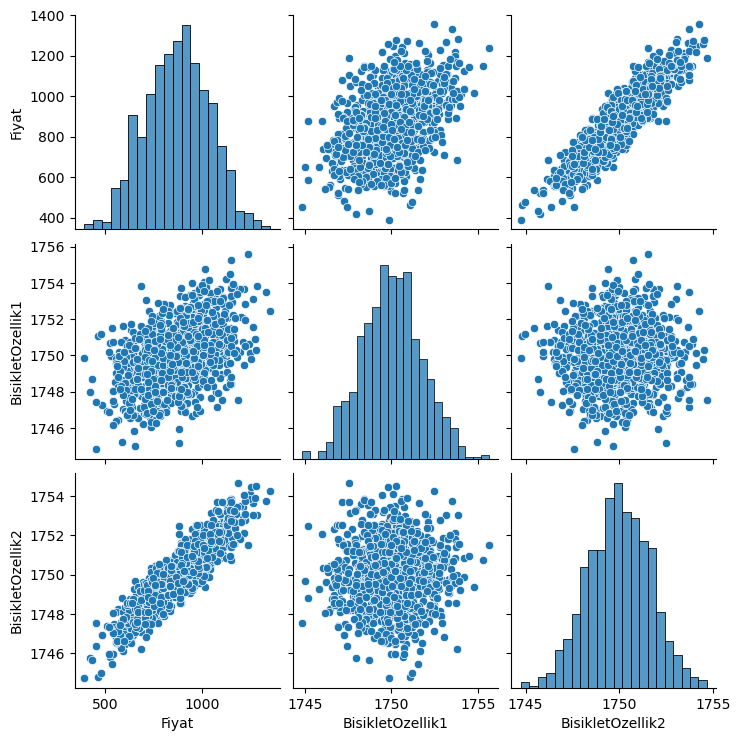

In [4]:
sbn.pairplot(dataFrame)

##Seeing some important and base tables.

In [5]:
##When look at the tables, this distribution is normal.

In [6]:
##We can divide our dataframe test and train. Therefore we will be use sklearn.model_selection.

from sklearn.model_selection import train_test_split

In [7]:
## We can divide test and train data as autamatically due to sklearn.mode_selection

# y = wx + b

# y = lable
# x = feature

y = dataFrame["Fiyat"].values
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

In [15]:
## We will make scale for more simple than training.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [16]:
## Now, we need to TensorFlow and extras.

import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
## We can start to ensure our model and create neutral networks that to ensure our model.
## Note: These values are random.

model = Sequential()

model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(5, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [19]:
## We can start to traain our model.

model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 795807.0000
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 795630.5000  
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 795454.2500  
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 795262.1875  
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 795045.3125 
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 794792.5625 
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 794502.1250 
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 794165.1250  
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 793778.0625 
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 793337.9375 
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 792838.8750 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 792271.8750 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 791631.5000 
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

In [22]:
## We will check the model training graph.

loss = model.history.history["loss"]

<Axes: >

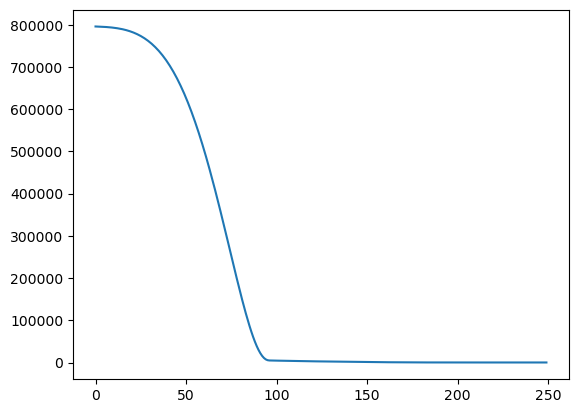

In [23]:
sbn.lineplot(x = range (len(loss)), y = loss)

In [24]:
 ## We can see decliner graph. This is positive and succesfull training.
## Now we will check and compare training and test values.

trainLoss = model.evaluate(x_train, y_train, verbose=0)
testLoss = model.evaluate(x_test, y_test, verbose=0)

In [25]:
trainLoss

73.35061645507812

In [46]:
testLoss

75.02815246582031

In [47]:
## These values pretty near. That mean is test and train is okay.

## Now we will check.

testPredicts = model.predict(x_test)
predictDF = pd.DataFrame(y_test, columns=["Real Y Values"])

## We ensured predicts values table and real values table. Now we will compare those.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [48]:
testPredicts = pd.Series(testPredicts.reshape(330, ))

testPredicts.shape

(330,)

In [49]:
estimateDF = pd.DataFrame(y_test, columns=["Real Y"])

In [52]:
estimateDF = pd.concat([estimateDF, testPredicts], axis=1)

In [54]:
predictDF = pd.concat([predictDF, testPredicts], axis=1)
predictDF.columns = ["Real Y", "Predict Y"]


In [55]:
predictDF

,Real Y,Predict Y
0,1081.652164,1078.466797
1,622.675990,624.066162
2,889.356810,876.594910
3,902.826733,894.662292
4,897.662404,899.917542
...,...,...
325,1028.438035,1014.178528
326,789.934950,791.165039
327,758.490486,766.350830
328,1172.871659,1168.367798


<Axes: xlabel='Real Y', ylabel='Predict Y'>

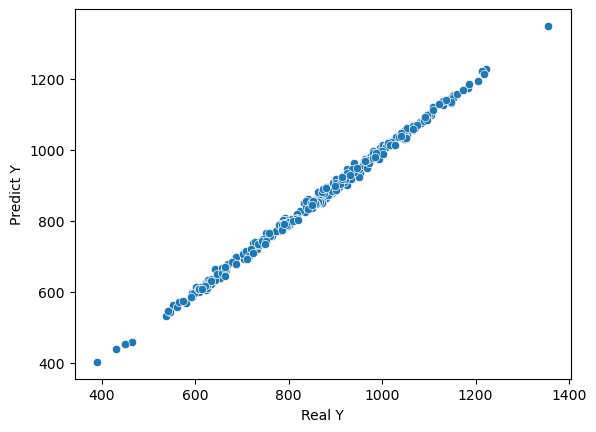

In [56]:
## When we look at the table, we can see our real values and predicts so near (for our aim that's enough).
## But better than be sure, we look at tha graph.

sbn.scatterplot(x = "Real Y", y = "Predict Y", data = predictDF)

In [57]:
## We can see better than this values so near. But exceptions can create some problems. We can delete those.

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
## We will look at the margin of error.

mean_absolute_error(predictDF["Predict Y"], predictDF["Real Y"])

6.935821591515149

In [59]:
mean_squared_error(predictDF["Predict Y"], predictDF["Real Y"])

75.02816420054799

In [60]:
### TEST

newCycleSpecials = [[1700, 2000]]

In [61]:
newCycleSpecials = scaler.transform(newCycleSpecials)

In [62]:
model.predict(newCycleSpecials)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[21022.781]], dtype=float32)

In [63]:
## The model worked. 
## TEST IS SUCCESFULL!

In [64]:
## Model Saving.

from tensorflow.keras.models import load_model

In [67]:
model.save("cycle_model.keras")

In [68]:
calling_cycle_model = load_model("cycle_model.keras")

In [69]:
## Test for working after save.

calling_cycle_model.predict(newCycleSpecials)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


array([[21022.781]], dtype=float32)